In [34]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(xx):
    return datetime.strptime(''+xx, '%Y-%m-%d')
 
series = read_csv('APT.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())

            Open  High   Low  Close  Adj Close  Volume
Date                                                  
2017-06-29  2.70  2.70  2.65   2.70       2.70   53203
2017-06-30  2.68  2.95  2.68   2.95       2.95   21668
2017-07-03  3.02  3.08  3.00   3.00       3.00   61756
2017-07-04  3.00  3.02  2.99   3.00       3.00   64658
2017-07-05  3.00  3.20  2.99   3.18       3.18  443935


<ipython-input-34-d6c2cb459a97>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


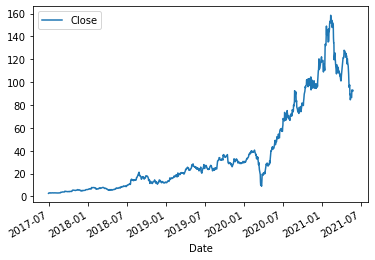

In [35]:
series1= series[['Close']]
series1.plot()
pyplot.show()

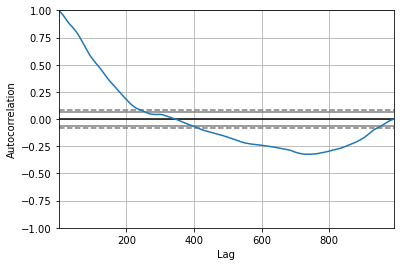

In [36]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series1)
pyplot.show()

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  990
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2101.170
Date:                Mon, 31 May 2021   AIC                           4214.341
Time:                        21:23:19   BIC                           4243.721
Sample:                    06-29-2017   HQIC                          4225.513
                         - 05-25-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0428      0.018     -2.356      0.018      -0.078      -0.007
ar.L2          0.0300      0.023      1.284      0.199      -0.016       0.076
ar.L3          0.1234      0.016      7.628      0.0

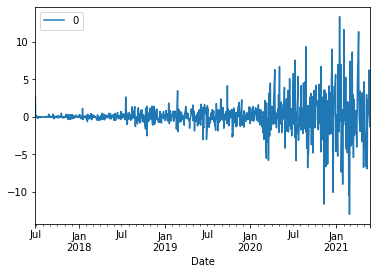

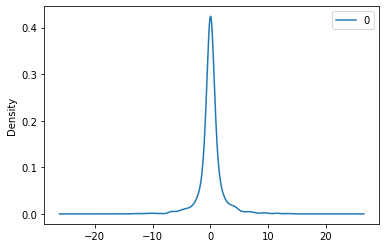

                0
count  990.000000
mean     0.073837
std      2.025410
min    -12.972097
25%     -0.433117
50%      0.013190
75%      0.497001
max     13.365061


In [42]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset

series1.index = series.index.to_period('D')
# fit model
model = ARIMA(series1, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

<ipython-input-43-8dd66e59c01b>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


predicted=36.999113, expected=36.700001
predicted=36.680845, expected=37.990002


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=37.971624, expected=37.799999
predicted=37.781520, expected=38.549999
predicted=38.529901, expected=38.060001
predicted=38.041728, expected=39.880001
predicted=39.864400, expected=39.200001
predicted=39.183451, expected=38.990002
predicted=38.973860, expected=39.439999
predicted=39.422470, expected=38.520000
predicted=38.501882, expected=39.389999
predicted=39.372413, expected=38.610001
predicted=38.591946, expected=38.560001
predicted=38.541960, expected=38.610001
predicted=38.592051, expected=39.520000
predicted=39.502568, expected=39.869999
predicted=39.852804, expected=40.500000
predicted=40.483185, expected=39.259998
predicted=39.242406, expected=38.990002
predicted=38.972297, expected=36.970001
predicted=36.953104, expected=37.029999
predicted=37.010951, expected=35.970001
predicted=35.951493, expected=36.470001
predicted=36.450640, expected=33.169998
predicted=33.144097, expected=32.639999
predicted=32.612977, expected=34.660000
predicted=34.637457, expected=33.189999


predicted=101.373576, expected=95.930000
predicted=95.901706, expected=94.690002
predicted=94.660207, expected=97.889999
predicted=97.861461, expected=97.589996
predicted=97.557290, expected=98.699997
predicted=98.671973, expected=101.139999
predicted=101.113540, expected=95.220001
predicted=95.189618, expected=95.809998
predicted=95.779940, expected=94.699997
predicted=94.669372, expected=95.010002
predicted=94.975174, expected=98.300003
predicted=98.277167, expected=98.559998
predicted=98.525877, expected=96.199997
predicted=96.169447, expected=94.500000
predicted=94.476172, expected=96.599998
predicted=96.570122, expected=95.680000
predicted=95.649714, expected=98.449997
predicted=98.420877, expected=96.180000
predicted=96.149935, expected=101.010002
predicted=100.981487, expected=109.930000
predicted=109.903327, expected=110.000000
predicted=109.973483, expected=114.599998
predicted=114.574708, expected=120.309998
predicted=120.282534, expected=111.290001
predicted=111.258009, expe

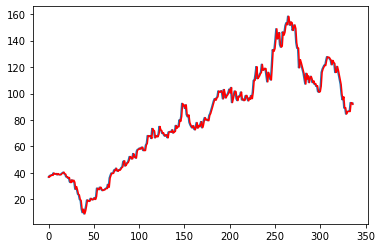

In [43]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
# def parser(x):
#     return datetime.strptime(''+x, '%Y-%m')
# series = read_csv('APT.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series1.index = series.index.to_period('D')
# split into train and test sets
X = series1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()